In [26]:
using MultivariateStats
using DCAUtils
using LinearAlgebra
using PyPlot
using StatsBase
using SparseHop

In [70]:
Z, W = quickread("../../DataAttentionDCA/data/PF00014/PF00014_mgap6.fasta.gz");
f1,f2 = DCAUtils.compute_weighted_frequencies(Z, 22, 0.2);
L, M = size(Z);

Meff = 2950.925530761646
θ = 0.2 threshold = 10.0
M = 8871 N = 53 Meff = 4645.142374563081


In [71]:
correl = f2 - f1*f1';

In [72]:
l, vv = eigen(correl);

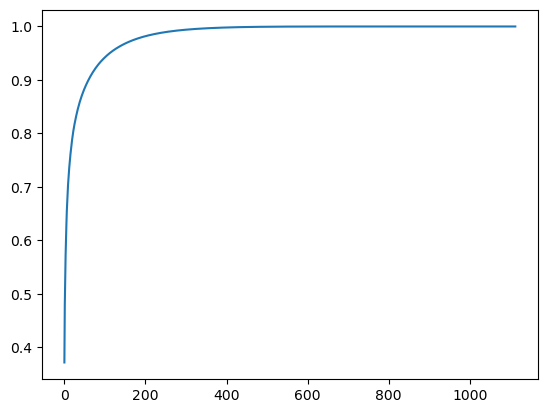

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8175b632b0>

In [115]:
correl2 = zeros(21*L,21*L);
correl_h = []

for n in sortperm(abs.(l), rev = true)
    correl2 .+= l[n] .*vv[:,n].*vv[:,n]'
    push!(correl_h, cor(correl[:], correl2[:]))
end
 
plot(correl_h)

In [121]:
correl_h[50]

0.8827980645462117

In [97]:
println("Full Cij vs Spectral decomposition (21 dims): $(cor(correl[:], correl2[:]))")

Full Cij vs Spectral decomposition (21 dims): 0.7938391456115033


In [58]:
f2rs = reshape(f2, 21, 53, 21, 53);
f1rs = reshape(f1 .* f1', 21, 53, 21, 53);

In [100]:
correl_rs = f2rs .- f1rs
correl_data = zeros(441,L*L)
for i in 1:L
    for j in 1:L
        correl_data[:,j+j*(i-1)] .= correl_rs[:,i,:,j][:]
    end
end

In [112]:
M = fit(PCA, correl_data, maxoutdim=21);

In [113]:
M

PCA(indim = 441, outdim = 21, principalratio = 0.8657115619425035)

Pattern matrix (unstandardized loadings):
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
              PC1           PC2           PC3           PC4           PC5           PC6           PC7           PC8           PC9          PC10          PC11          PC12          PC13          PC14          PC15          PC16          PC17          PC18          PC19          PC20          PC21
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────